# Is Nuclear Energy a Viable Green Energy option for California?

## CIV 190 : Data and Equity for Environmental Engineering
## Final Project Group 2 - Fall 2022

**Group Members**

- Alexandre Georges
- Emily Kraemer
- Sumukhi Prasad
- Story Sandy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt

from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

## 1. Data Acquisition and Cleaning

In [3]:
# data tables paths

file1 = 'data/table_1_9A_all.csv'
file2 = 'data/table_1_9B_all.csv'
net_generation_file = 'data/Net_generation_for_all_sectors.csv'

In [4]:
# Dataframe imports from data tables

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [5]:
# Cleaning Dataframes

def clean_df(df):
    df = df.rename(columns={
        "Census Division\nand State": 'State/Region',
        'August 2022': 'Aug 22',
        'August 2021': 'Aug 21',
        'Percentage\nChange': 'Percent Change'
    })
    df = df.sort_values(by='State/Region')
    df = df.replace('--', 0)
    df = df.astype({'Aug 22': int,
                    'Aug 21': int})
    df['Percent Change'] = ((df['Aug 21'] - df['Aug 22'])/df['Aug 22'])*100
    df = df.fillna(0)
    return df

df1 = clean_df(df1)
df1

,State/Region,Aug 22,Aug 21,Percent Change
36,Alabama,3914,4066,3.883495
59,Alaska,0,0,0.000000
46,Arizona,2930,2933,0.102389
41,Arkansas,1360,1337,-1.691176
55,California,1679,1681,0.119119
...,...,...,...,...
17,West North Central,3522,3359,-4.628052
40,West South Central,6627,6515,-1.690056
34,West Virginia,0,0,0.000000
16,Wisconsin,881,823,-6.583428


## 2. EDA

In [6]:
to_drop =  ['East North Central', 'East South Central', 'Middle Atlantic', 'Pacific Contiguous', 'Pacific Noncontiguous', 'South Atlantic', 'U.S. Total', 'West North Central', 'New England', 'Mountain', 'West North Central', 'West South Central']
df1_states = df1[~df1['State/Region'].isin(to_drop)]
df1_states['State Codes'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
df1_states.head()

C:\Users\erich\AppData\Local\Temp\ipykernel_24688\3529036016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_states['State Codes'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']


,State/Region,Aug 22,Aug 21,Percent Change,State Codes
36,Alabama,3914,4066,3.883495,AL
59,Alaska,0,0,0.000000,AK
46,Arizona,2930,2933,0.102389,AZ
41,Arkansas,1360,1337,-1.691176,AR
55,California,1679,1681,0.119119,CA


In [42]:
# create figure
fig = px.choropleth(df1_states, locationmode="USA-states", locations='State Codes', range_color=(-75,75), color='Percent Change', color_continuous_scale="RdBu", scope="usa", title='Percent Change in Nuclear Generation, 2021-2022')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()

## Current Energy Mix

In [8]:
# Importing Net generation data

netgen_df = pd.read_csv(net_generation_file)
# Cleaning unneeded rows and columns
netgen_df = netgen_df.drop(index=[0,1,2,3,4,5,6])
a = np.array(['Net Generation Sources', 'Units', 'Source Key'])
b = np.arange(2001, 2022)
columns = np.append(a, b)
netgen_df.columns = columns
netgen_df = netgen_df.reset_index()
netgen_df = netgen_df.drop(columns=['index', 'Units', 'Source Key'])
netgen_df = netgen_df.fillna(0)
netgen_df = netgen_df.replace(to_replace='--', value=0)
netgen_df = netgen_df[:-1]

netgen_df['Net Generation Sources'] = netgen_df['Net Generation Sources'].str.replace(r'United States : ', '', regex=True)

netgen_df.head()

,Net Generation Sources,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,coal,1903956,1933130,1973737,1978301,2012873,1990511,2016456,1985801,1755904,...,1514043,1581115,1581710.0,1352398.0,1239149.0,1205835.0,1149487.0,964957.0,773393.0,897885.0
1,petroleum liquids,114647,78701,102734,100391,99840,44460,49505,31917,25972,...,13403,13820,18276.0,17372.0,13008.0,12414.0,16245.0,11522.0,9662.0,11665.0
2,petroleum coke,10233,15867,16672,20754,22385,19706,16234,14325,12964,...,9787,13344,11955.0,10877.0,11197.0,8976.0,8981.0,6819.0,7679.0,7511.0
3,natural gas,639129,691006,649908,710100,760960,816441,896590,882981,920979,...,1225894,1124836,1126635.0,1334668.0,1379271.0,1297703.0,1471843.0,1588533.0,1626790.0,1579361.0
4,other gases,9039,11463,15600,15252,13464,14177,13453,11707,10632,...,11898,12853,12022.0,13117.0,12807.0,12469.0,13463.0,12591.0,11818.0,11397.0


In [9]:
# Dropping other renewables because its always zero
netgen_df = netgen_df[~(netgen_df['Net Generation Sources'] == 'other renewables')]

In [10]:
# Without hydro storage

no_storage = netgen_df[~(netgen_df['Net Generation Sources'] == 'hydro-electric pumped storage')]

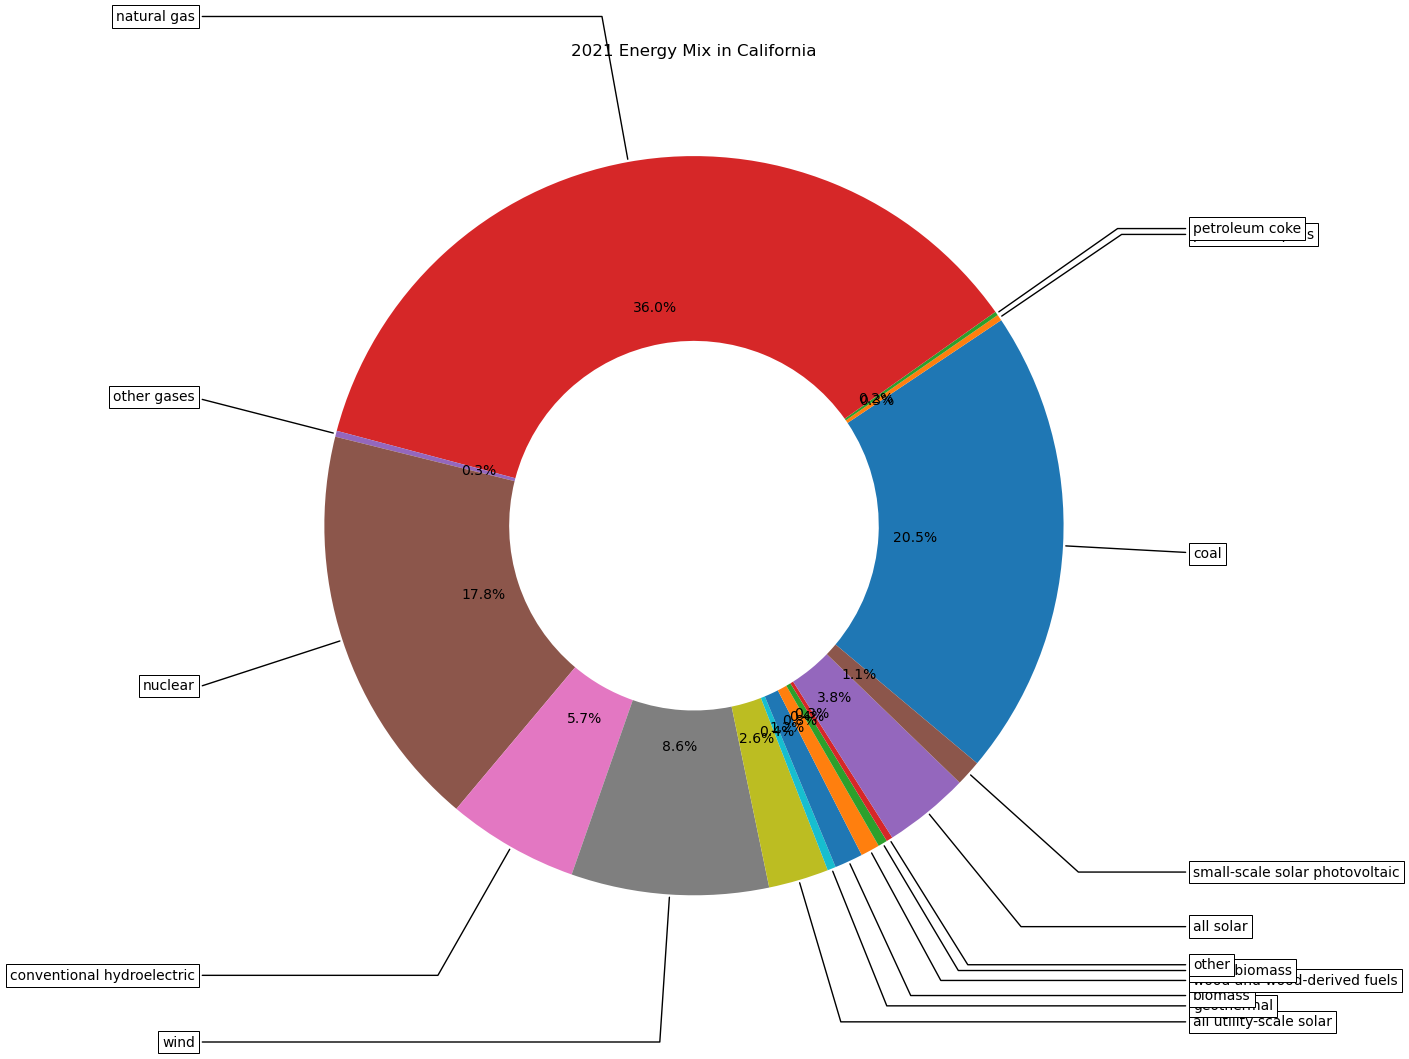

In [11]:
fig, ax = plt.subplots(figsize=(12,12))

wedges, pie, prct = ax.pie(no_storage['2021'], wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%')

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(no_storage['Net Generation Sources'].iloc[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('2021 Energy Mix in California')
plt.show()

## Timeseries 1 : Consumption for each energy source 

### Nuclear Timeseries

In [12]:
netgen_df = netgen_df.set_index('Net Generation Sources')

netgen_r = netgen_df.transpose().astype(float)
netgen_r.head()

Net Generation Sources,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic
2001,1903956.0,114647.0,10233.0,639129.0,9039.0,768826.0,216961.0,6737.0,543.0,13741.0,49748.0,35200.0,14548.0,-8823.0,11906.0,0.0,0.0
2002,1933130.0,78701.0,15867.0,691006.0,11463.0,780064.0,264329.0,10354.0,555.0,14491.0,53709.0,38665.0,15044.0,-8743.0,13527.0,0.0,0.0
2003,1973737.0,102734.0,16672.0,649908.0,15600.0,763733.0,275806.0,11187.0,534.0,14424.0,53341.0,37529.0,15812.0,-8535.0,14045.0,0.0,0.0
2004,1978301.0,100391.0,20754.0,710100.0,15252.0,788528.0,268417.0,14144.0,575.0,14811.0,53537.0,38117.0,15421.0,-8488.0,14232.0,0.0,0.0
2005,2012873.0,99840.0,22385.0,760960.0,13464.0,781986.0,270321.0,17811.0,550.0,14692.0,54277.0,38856.0,15420.0,-6558.0,12821.0,0.0,0.0


<AxesSubplot:ylabel='nuclear'>

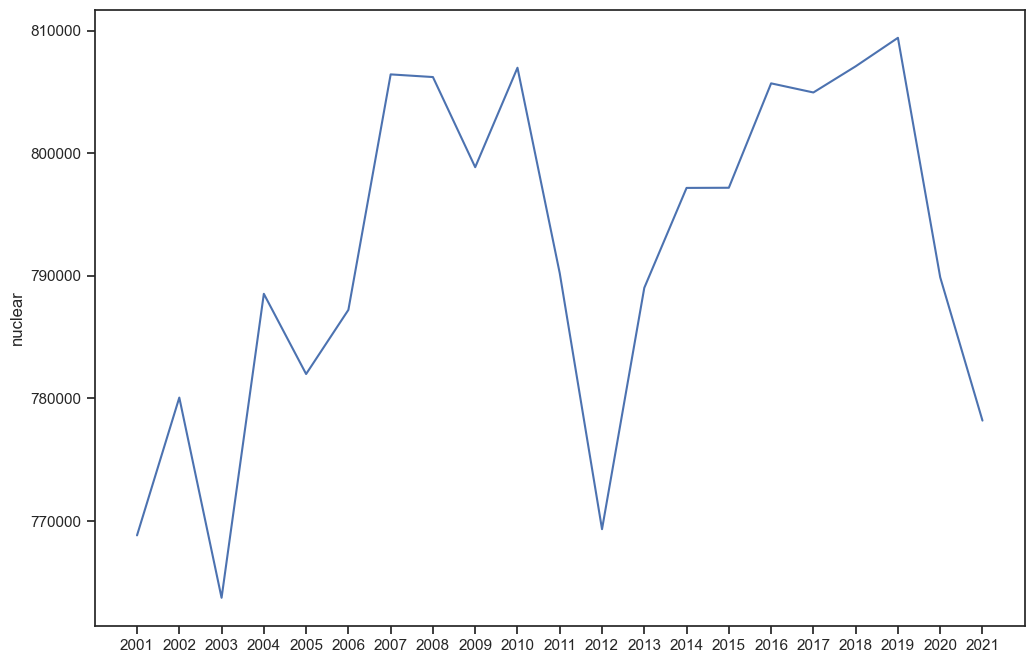

In [13]:
sns.set_theme(style='ticks')

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

fig, ax = plt.subplots(figsize=(12,8))
# Plot the lines on two facets
sns.lineplot(
    data=netgen_r,
    x=netgen_r.index, y="nuclear",
    ax=ax
)

### Multi Timeseries w/ all sources

In [14]:
sources = netgen_df.index.values.astype(str)
sources

array(['coal', 'petroleum liquids', 'petroleum coke', 'natural gas',
       'other gases', 'nuclear', 'conventional hydroelectric', 'wind',
       'all utility-scale solar', 'geothermal', 'biomass',
       'wood and wood-derived fuels', 'other biomass',
       'hydro-electric pumped storage', 'other', 'all solar',
       'small-scale solar photovoltaic'], dtype='<U30')

Text(0.5, 1.0, 'Net generation from sources in California')

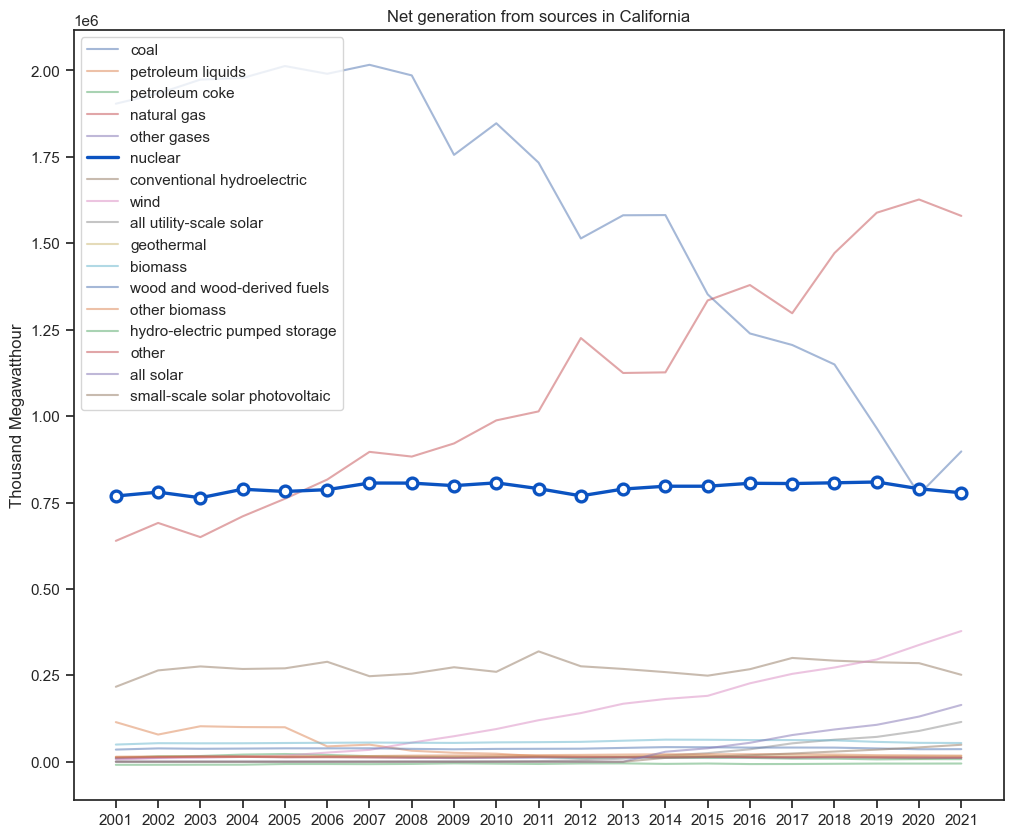

In [15]:
fig, ax = plt.subplots(figsize=(12,10))

for source in sources:
    x = netgen_r.index.values
    y = netgen_r[source]
    
    if source == 'nuclear':
        ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10, label=source)
        ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
        # Pass the first and last values to the add_label function
    else: 
        ax.plot(x, y, lw=1.5, alpha=0.5, label=source)

ax.legend(loc='upper left')
ax.set_ylabel('Thousand Megawatthour')
ax.set_title('Net generation from sources in California')

### Percentage Usage

In [17]:
netgen_r['total'] = netgen_r[sources].sum(axis=1)
percgen = netgen_r.copy()

for source in sources:
    percgen[source] = (netgen_r[source]*100)/netgen_r['total']

percgen.head()

Net Generation Sources,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,total
2001,50.284189,3.027870,0.270257,16.879636,0.238723,20.304982,5.730021,0.177927,0.014341,0.362905,1.313863,0.929645,0.384218,-0.233019,0.314442,0.0,0.0,3786391.0
2002,49.413342,2.011701,0.405581,17.663021,0.293009,19.939461,6.756596,0.264662,0.014187,0.370409,1.372873,0.988328,0.384544,-0.223483,0.345768,0.0,0.0,3912162.0
2003,50.139044,2.609762,0.423521,16.509680,0.396288,19.401188,7.006328,0.284185,0.013565,0.366414,1.355027,0.953353,0.401674,-0.216815,0.356787,0.0,0.0,3936527.0
2004,49.161426,2.494749,0.515744,17.646217,0.379017,19.595178,6.670250,0.351483,0.014289,0.368058,1.330412,0.947220,0.383217,-0.210930,0.353670,0.0,0.0,4024092.0
2005,48.978611,2.429376,0.544687,18.516202,0.327615,19.027822,6.577637,0.433390,0.013383,0.357496,1.320705,0.945471,0.375210,-0.159574,0.311969,0.0,0.0,4109698.0


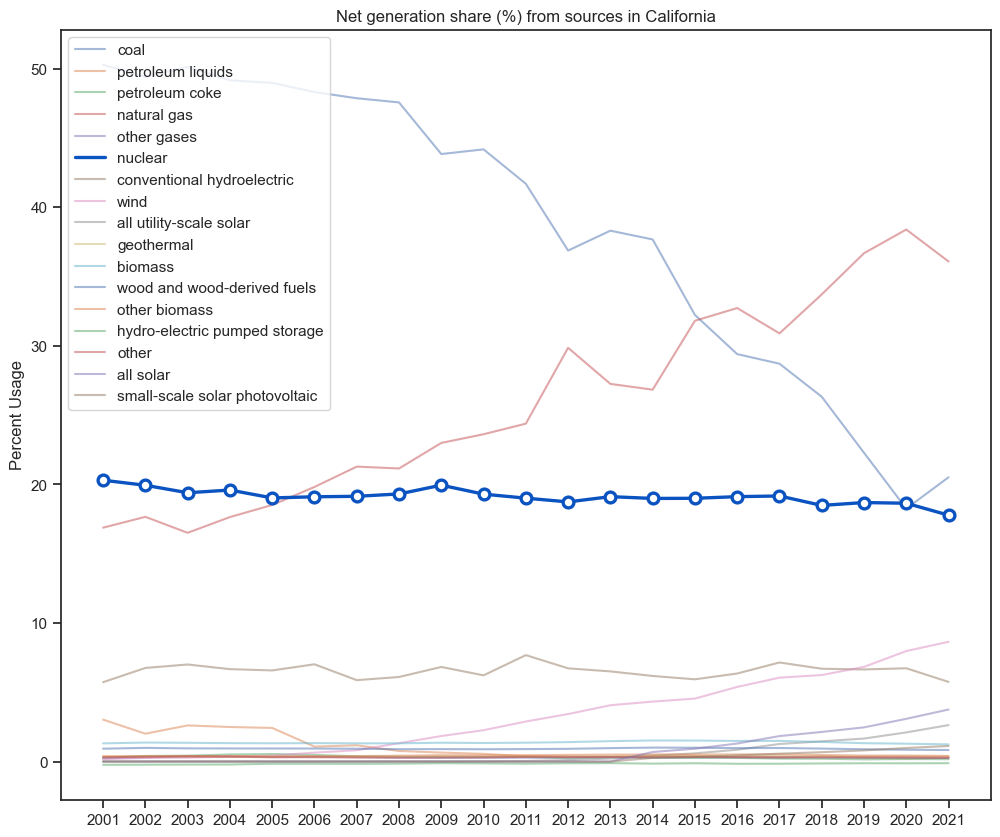

In [20]:
fig, ax = plt.subplots(figsize=(12,10))

for source in sources:
    x = percgen.index.values
    y = percgen[source]
    
    if source == 'nuclear':
        ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10, label=source)
        ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
        # Pass the first and last values to the add_label function
    else: 
        ax.plot(x, y, lw=1.5, alpha=0.5, label=source)

ax.legend(loc='upper left')
ax.set_ylabel('Percent Usage')
ax.set_title('Net generation share (%) from sources in California');

In [63]:
def plot_source(source, data, annotate, ax):
    for source_inner in sources:
        x = data.index.values
        y = data[source_inner]
        
        if source_inner == source:
            ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
            ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
            # Pass the first and last values to the add_label function
        else: 
            ax.plot(x, y, lw=1.5, alpha=0.5)
    ax.set_xticks(np.arange(2001, 2022, 5))
    ax.set_ylabel('Percent Usage')
    ax.set_title(source);

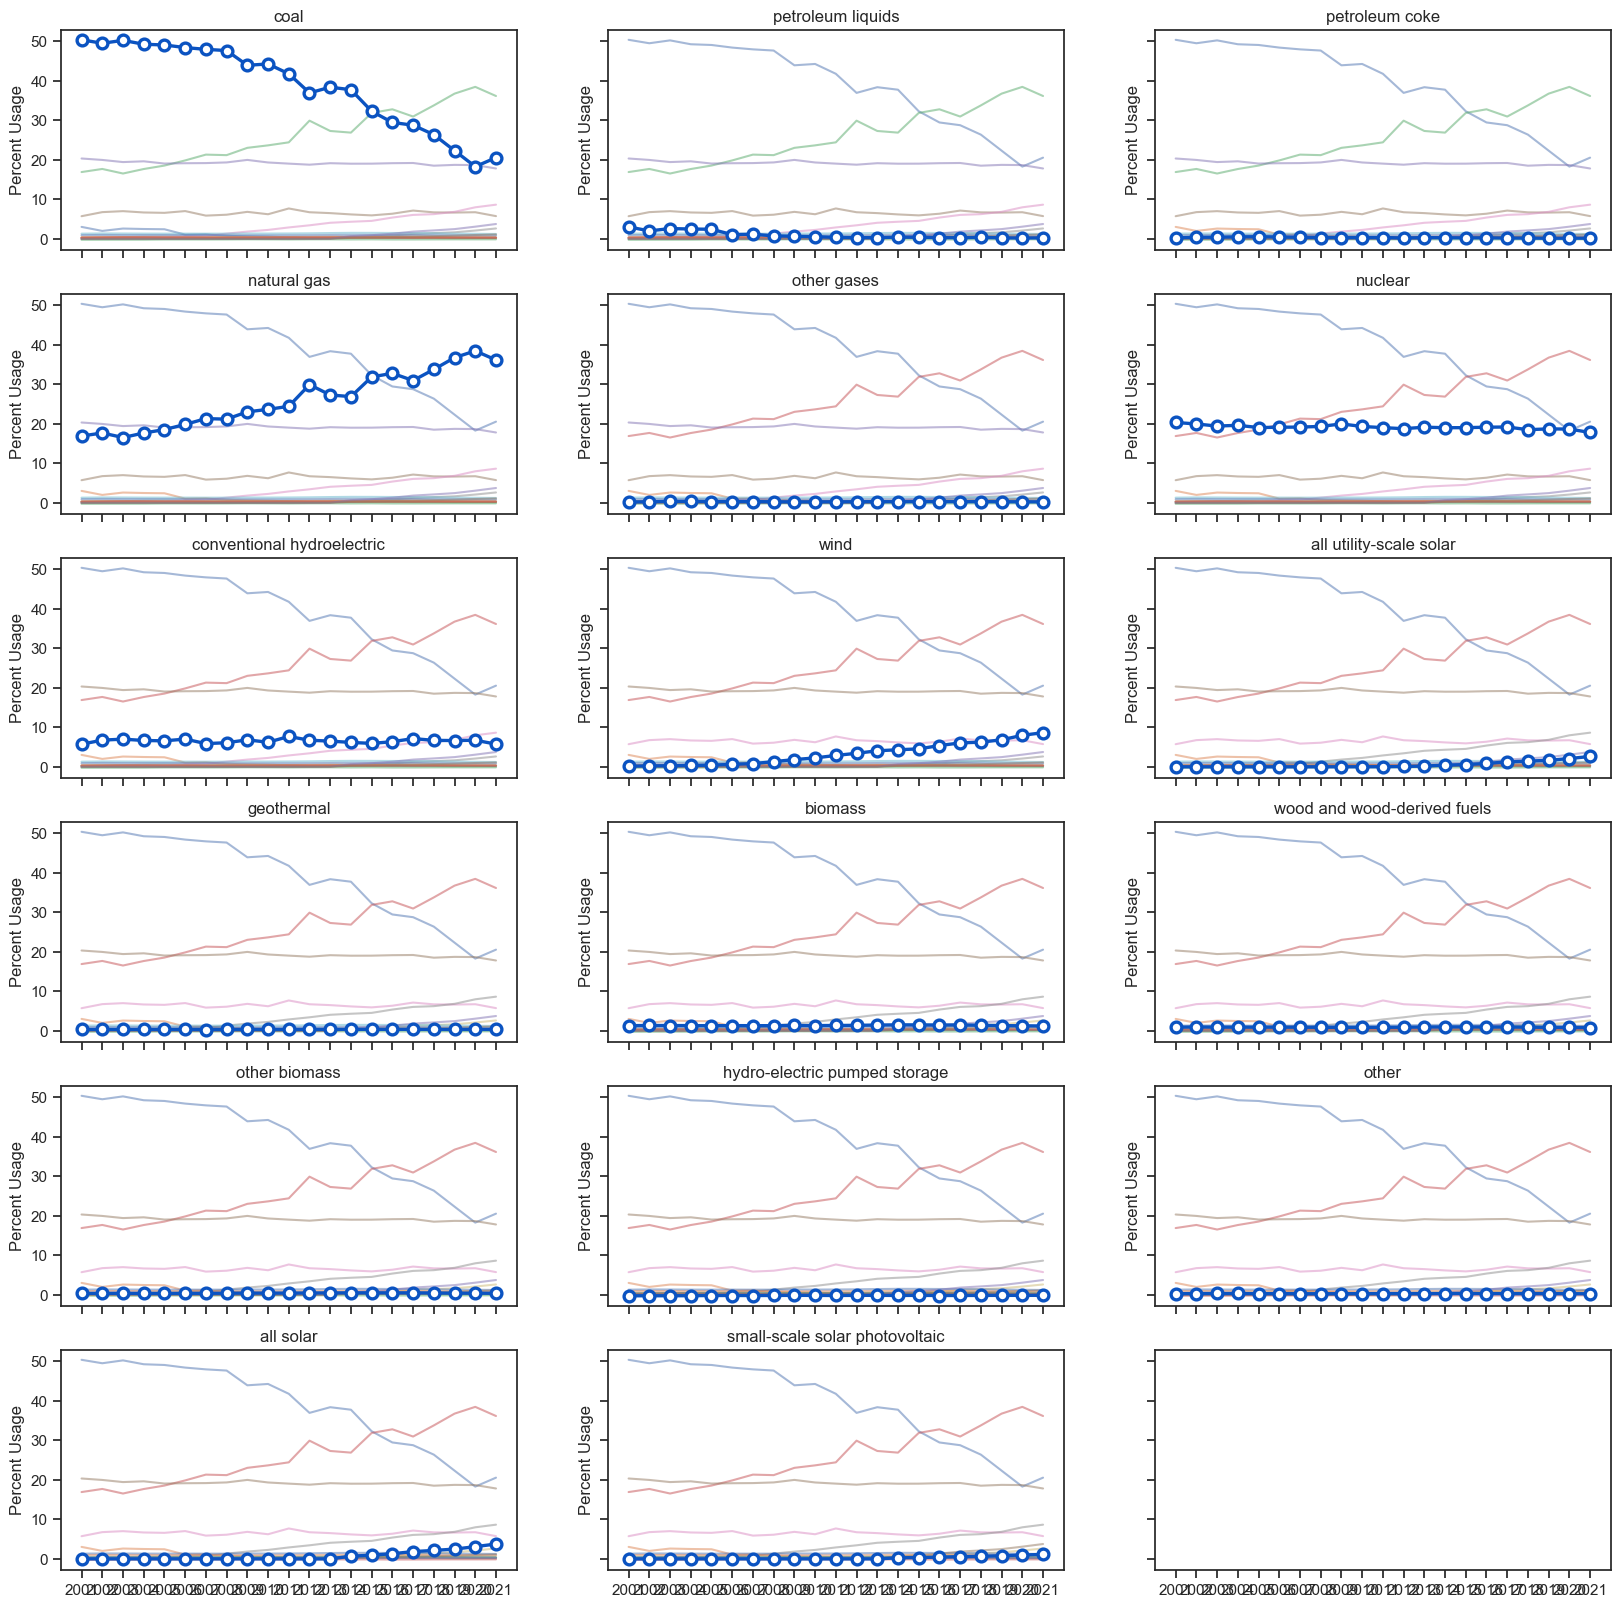

In [64]:
fig, axes = plt.subplots(6,3, sharex=True, sharey=True, figsize=(20,20))
for idx, (ax, source) in enumerate(zip(axes.ravel(), sources)):
    annotate = idx == 0
    plot_source(source, percgen, annotate, ax)